### Import necessary libraries

In [34]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### Download all pages

In [54]:
# source url
url = "https://esportsresearch.net/literature/items?page={}"

"""
Since there are seperate 15 pages in the source website,
We have to download each of them, one by one, using iteration.

"""
# range of numbers

numbers = range(1,16) # NOTE: 16 is excluded

for i in numbers:
    
    new_url = url.format(i)
    print(new_url)
    
    # parsing html source
    data = requests.get(new_url)
    
    # save them as a html page
    with open("sample_data/page_{}.html".format(i), "w+", encoding="utf-8") as f:
        f.write(data.text) 

https://esportsresearch.net/literature/items?page=1
https://esportsresearch.net/literature/items?page=2
https://esportsresearch.net/literature/items?page=3
https://esportsresearch.net/literature/items?page=4
https://esportsresearch.net/literature/items?page=5
https://esportsresearch.net/literature/items?page=6
https://esportsresearch.net/literature/items?page=7
https://esportsresearch.net/literature/items?page=8
https://esportsresearch.net/literature/items?page=9
https://esportsresearch.net/literature/items?page=10
https://esportsresearch.net/literature/items?page=11
https://esportsresearch.net/literature/items?page=12
https://esportsresearch.net/literature/items?page=13
https://esportsresearch.net/literature/items?page=14
https://esportsresearch.net/literature/items?page=15


### Create a DataFrame table

In [56]:
# lists for attributes
titles_list= []
tags_list = []

# iterate by the N of pages
for html in numbers:
    with open("sample_data/page_{}.html".format(html),encoding="utf-8") as f:
        page = f.read()
        
        # create a Bs4 object
        soup = BeautifulSoup(page, 'html.parser')
        
        # Get the content of "item record" class
        records = soup.find_all("div", class_="item record")
        for record in records:
            # title 
            title = record.a.text
            # push to the list
            titles_list.append(title)
            try:
                
                # get the tag from record
                tags = record.find(class_="tags")
                tag = tags.text.replace("Tags:", "").replace("\n", "")
                tags_list.append(tag)
            except:
                tags_list.append(None)
df['Title'] = pd.DataFrame(titles_list)
df['Tag'] = pd.DataFrame(tags_list)
df

,Title,Tag
0,Influence of service performance variables and...,"brand management, esports, esports events, loy..."
1,Esports Governance: An Analysis of Rule Enforc...,"Competitive Rulings, esports, Esports Governan..."
2,Improving the Health of Emerging Adult Gamers—...,"diet, esports, gaming, nutrition, Online Games..."
3,Policy Recommendation on Esports for the Europ...,"esports, EU, Europe, European Parliament, Euro..."
4,Background Analysis on Esports for the Europea...,"esports, EU, Europe, European Parliament, Euro..."
...,...,...
1455,The Legal Status of Video Games: Comparative A...,"legal, national analysis"
1456,Esports Consumer Perspectives on Match-Fixing:...,"cheating, Gambling, game integrity, gaming, ma..."
1457,Institutionalisation in E-Sports,"governance, institutionalisation, stability, v..."
1458,E-Sport and the EU: The View from the English ...,"elements of sport, physical element, social fu..."


### Clean the Data

In [57]:
#Empty values:
df.isnull().sum().sort_values(ascending = False)

Tag      380
Title      0
dtype: int64

In [63]:
df["Tag"] = df["Tag"].fillna(value="")
df.isnull().sum().sort_values(ascending = False)

Title    0
Tag      0
dtype: int64

### Word Cloud: Sample data

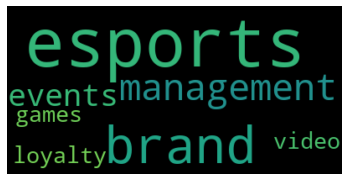

In [59]:
text = df.Tag[0]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Combining all tags

In [61]:
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(df['Tag'].str.lower())
word_string

"brand management, esports, esports events, loyalty, video games competitive rulings, esports, esports governance, league of legends diet, esports, gaming, nutrition, online games, social marketing, video games, young adults esports, eu, europe, european parliament, european union, regulatory esports, eu, europe, european parliament, european union, regulatory content creation, contract, contract drafting, contract duration, employee, employer, employment, employment law, international private law, labor law, law, youth protection economic models, esports, leagues’ regulation, professional esports clubs, utility maximization athlete burnout, esports players, esports players’ motivation, online games, self-determination theory ecosystem, esports, esports industry, interorganisational relations theory, value chain  esport, individual performance, obesity conformance, electronic gaming, institutional theory, manipulation, partial legitimacy, sports governance, sports organization competit

## The most common words in EsportsResearch:
### Let's see the word map of the most commonly used words from EsportsResearch tags:

(-0.5, 1999.5, 999.5, -0.5)

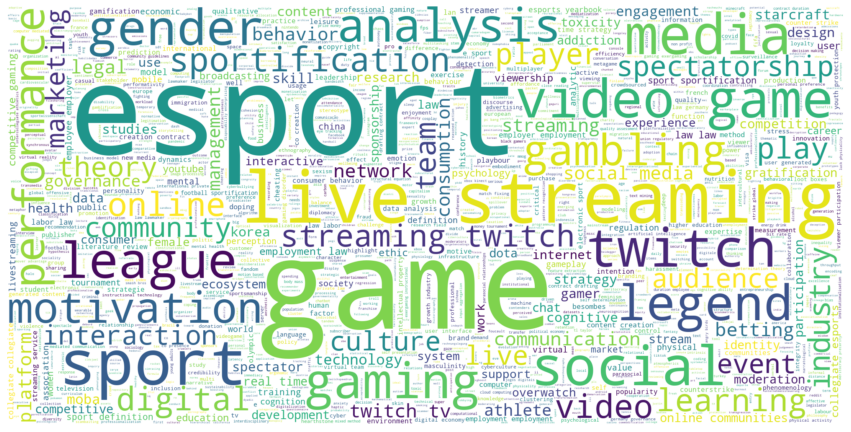

In [66]:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=1460, max_font_size= 300,  width=2000, height=1000)
wc.generate(word_string)

plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

# References

##### https://www.crummy.com/software/BeautifulSoup/bs4/doc/
##### https://pypi.org/project/wordcloud/
##### https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
##### https://www.datacamp.com/tutorial/wordcloud-python